# Task 3: Non-Linear Curve Fitting

Members: Lars Olav Thorbjørnsen, Stein Are Årsnes og Sanjai Vijayaratnam

### Abstract

This task explores non-linear curve fitting techniques to model complex, non-linear relationships within laboratory-measured and task-specific datasets. Using python's scipy.optimize library, we fit multiple rheological models to laboratory viscosity, including Power Law, Herschel-Bulkley and Robertson-Stiff models, capturing the the behavior of fluid dynamics under different shear rates. Each model being evaluated on its $\ R^2$ score, providing a quantative measure of model accuracy. Applying similar non-linear optimization techniques to the task data, focusing on mapping relationships between geographysical properties such as density(DEN), shear wave velocity(Vs), and neutron porosity(NEU) with the compressional wave velocity (Vp). Optimized curve-fitting parameters provide insight into feature's contribution to Vp, while performance metrics and visualizations reveal the comparative effectiveness on the different models.

### Introduction

Rheology, the study of fluid flow and deformation, plays a critical role iin understanding how materials behave under different stress and flow conditions. Rheology properties, like viscosity, are essential for determining fluid dynamics in applications such as the petroleum industry, where they impact the performance of drilling fluids and cement. This task focuses on modeling laboratory-measured viscometer data to characterize these properties. Using the three rheological models, Power Law, Herschel-Bulkley, and Robertson and Stiff, this task will optimize parameters for each model to best fit the dataset, display each fit with scatter plots, and evaluate their accuracy with $\ R^2$ values. By comparing, this analysis aims to find the most accurate approach for predicting fluid behaviors. 

### Laboratory-measured viscosity data

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score  

Given a dataset of shear-rate and shear-stress, each model will be applied to fit the data through parameter optimization. The Rheological models we evaluate are: 
- Power Law:$\ y = a * x^b$  
- Herschel-Bulkley: $\ y = a * x^b + c$  
- Robertson and Stiff:$\ y = a * (x + b)^c$ 

Under is each model displayed with scatter and line plot.

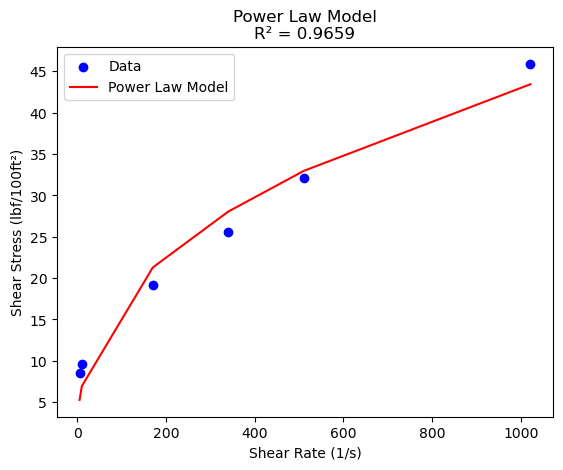

Power Law Model Parameters: [2.75356261 0.39811263]
Power Law Model R²: 0.9658861828739901




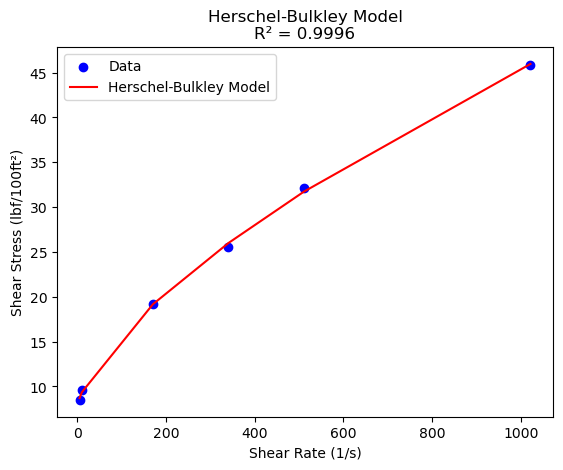

Herschel-Bulkley Model Parameters: [0.3712281  0.66935514 7.59810823]
Herschel-Bulkley Model R²: 0.9996064451715285




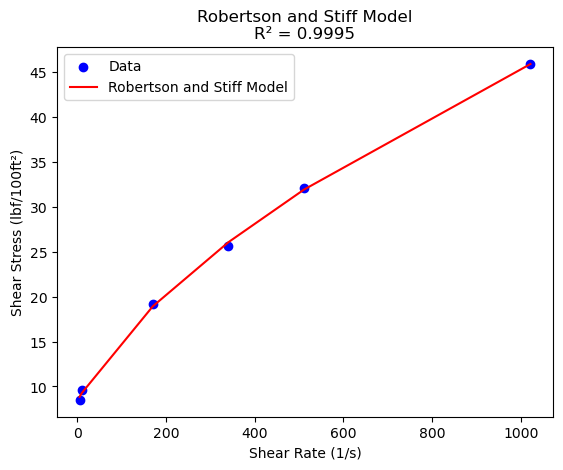

Robertson and Stiff Model Parameters: [ 0.90003157 52.67489453  0.56329938]
Robertson and Stiff Model R²: 0.9994670494050243




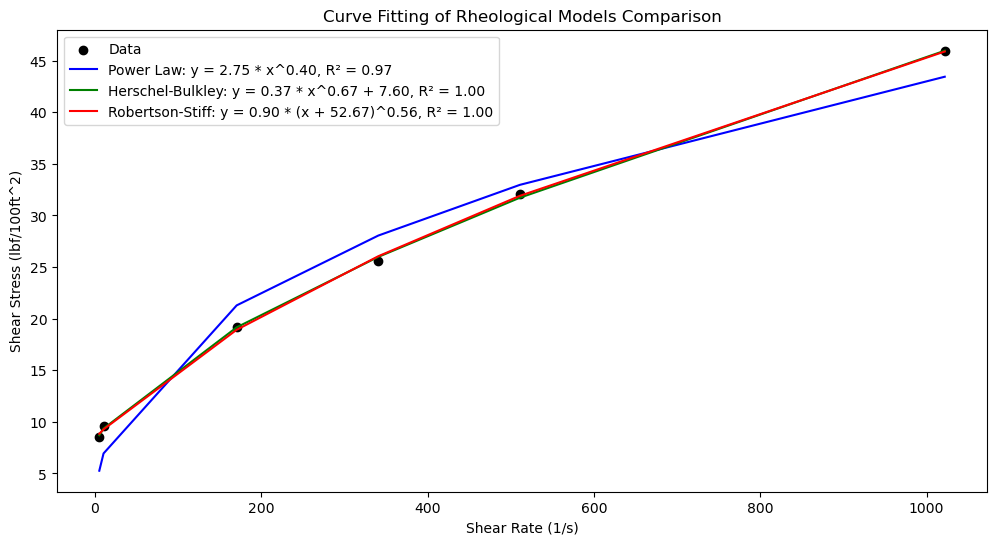

In [2]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

shear_rate = np.array([5.1, 10.2, 170.3, 340.6, 510.9, 1021.8])
shear_stress = np.array([8.5, 9.6, 19.2, 25.6, 32.1, 45.9]) 
def power_law(x, a, b):
    return a * x**b

def herschel_bulkley(x, a, b, c):
    return a * x**b + c

def robertson_stiff(x, a, b, c):
    return a * (x + b)**c

def fit_and_plot(model_func, x, y, initial_params, title):
    popt, _ = curve_fit(model_func, x, y, p0=initial_params)
    
    y_model = model_func(x, *popt)
    
    r2 = r2_score(y, y_model)
    
    plt.figure()
    plt.scatter(x, y, label="Data", color="blue")
    plt.plot(x, y_model, label=f"{title} Model", color="red")
    plt.title(f"{title} Model\nR² = {r2:.4f}")
    plt.xlabel("Shear Rate (1/s)")
    plt.ylabel("Shear Stress (lbf/100ft²)")
    plt.legend()
    plt.show()
    
    print(f"{title} Model Parameters:", popt)
    print(f"{title} Model R²:", r2)
    print("\n")

fit_and_plot(power_law, shear_rate, shear_stress, [1, 1], "Power Law")
fit_and_plot(herschel_bulkley, shear_rate, shear_stress, [1, 1, 1], "Herschel-Bulkley")
fit_and_plot(robertson_stiff, shear_rate, shear_stress, [1, 1, 1], "Robertson and Stiff")

popt_power, _ = curve_fit(power_law, shear_rate, shear_stress)
a_power, b_power = popt_power
shear_stress_power = power_law(shear_rate, *popt_power)
r2_power = r2_score(shear_stress, shear_stress_power)

popt_hb, _ = curve_fit(herschel_bulkley, shear_rate, shear_stress)
a_hb, b_hb, c_hb = popt_hb
shear_stress_hb = herschel_bulkley(shear_rate, *popt_hb)
r2_hb = r2_score(shear_stress, shear_stress_hb)

popt_rs, _ = curve_fit(robertson_stiff, shear_rate, shear_stress)
a_rs, b_rs, c_rs = popt_rs
shear_stress_rs = robertson_stiff(shear_rate, *popt_rs)
r2_rs = r2_score(shear_stress, shear_stress_rs)

plt.figure(figsize=(12, 6))
plt.scatter(shear_rate, shear_stress, color='black', label='Data')
plt.plot(shear_rate, shear_stress_power, label=f'Power Law: y = {a_power:.2f} * x^{b_power:.2f}, R² = {r2_power:.2f}', color='blue')
plt.plot(shear_rate, shear_stress_hb, label=f'Herschel-Bulkley: y = {a_hb:.2f} * x^{b_hb:.2f} + {c_hb:.2f}, R² = {r2_hb:.2f}', color='green')
plt.plot(shear_rate, shear_stress_rs, label=f'Robertson-Stiff: y = {a_rs:.2f} * (x + {b_rs:.2f})^{c_rs:.2f}, R² = {r2_rs:.2f}', color='red')
plt.xlabel('Shear Rate (1/s)')
plt.ylabel('Shear Stress (lbf/100ft^2)')
plt.legend()
plt.title('Curve Fitting of Rheological Models Comparison')
plt.show()

The results from the plots shows that Herschel-Bulkley model performs the most accurate on the given dataset with an $\ R^2$ score of 0.9996064451715285. In the model comparison plot, the $\ R^2$ scores get rounded up to 1.

#### 3.2

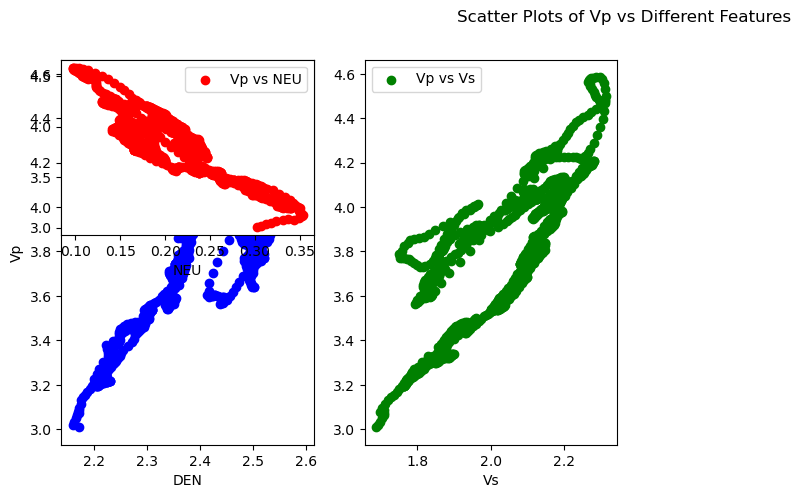

In [3]:
df = pd.read_excel('CleanedFeatureSelectedFiltered.xlsx')
def gardner_model(a, b):
    return a * df['DEN']**b

def fit_and_plot_mapping(x, y, model_func, initial_params, title):
    plt.scatter(x, y, label="Data", color="blue")
    try:
        popt, _ = curve_fit(model_func, x, y, p0=initial_params, maxfev=200000)
        y_model = model_func(x, *popt)
        
        r2 = r2_score(y, y_model)
        
        plt.plot(x, y_model, color="red", label=f"{title} Model Fit")
        plt.title(f"{title} Model\nR² = {r2:.4f}")
        plt.xlabel("X Value")
        plt.ylabel("Vp")
        plt.legend()
        plt.show()
        
        print(f"{title} Model Parameters:", popt)
        print(f"{title} Model R²:", r2)
        print("\n")
        return r2
    except RuntimeError as e:
        print(f"{title} Model: Optimal parameters not found. {str(e)}")
        return None

r2_scores = {
    "DEN": {"Power Law": [], "Herschel Bulkley": [], "Robertson and Stiff": [], "Gardner": []},
    "Vs": {"Power Law": [], "Herschel Bulkley": [], "Robertson and Stiff": [], "Gardner": []},
    "NEU": {"Power Law": [], "Herschel Bulkley": [], "Robertson and Stiff": [], "Gardner": []}
}

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(df['DEN'], df['Vp'], color='blue', label='Vp vs DEN')
plt.xlabel("DEN")
plt.ylabel("Vp")
plt.legend()

plt.subplot(1, 4, 2)
plt.scatter(df['Vs'], df['Vp'], color='green', label='Vp vs Vs')
plt.xlabel("Vs")
plt.legend()

plt.subplot(2, 4, 1)
plt.scatter(df['NEU'], df['Vp'], color='red', label='Vp vs NEU')
plt.xlabel("NEU")
plt.legend()

plt.suptitle("Scatter Plots of Vp vs Different Features")
plt.show()


These scatter plots visualize how the compressional wave velocity (Vp) is related to the different geological properties: density (DEN), shear wave velocity (Vs), and neuropore (NEU). Each plot helps visualize how Vp varies with these factors, providing insights into the physical properties and behavior of the materials being analyzed before applying further modeling or curve fitting techniques.

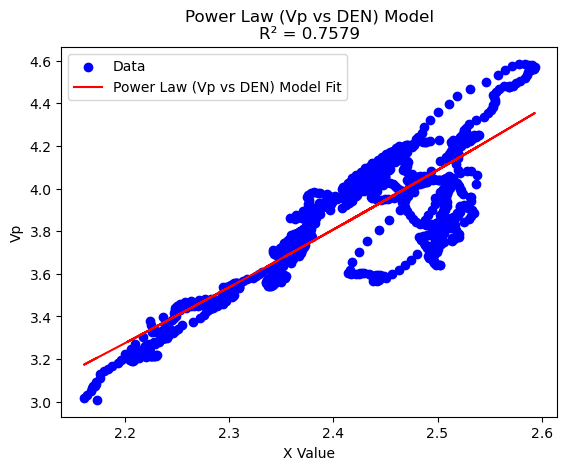

Power Law (Vp vs DEN) Model Parameters: [0.83632805 1.73130143]
Power Law (Vp vs DEN) Model R²: 0.7579363665252637




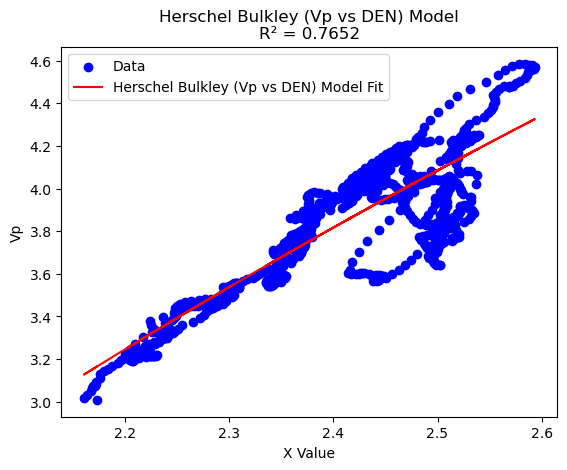

Herschel Bulkley (Vp vs DEN) Model Parameters: [ 3.59106740e+03  1.82434554e-03 -3.59299036e+03]
Herschel Bulkley (Vp vs DEN) Model R²: 0.7651836435288117




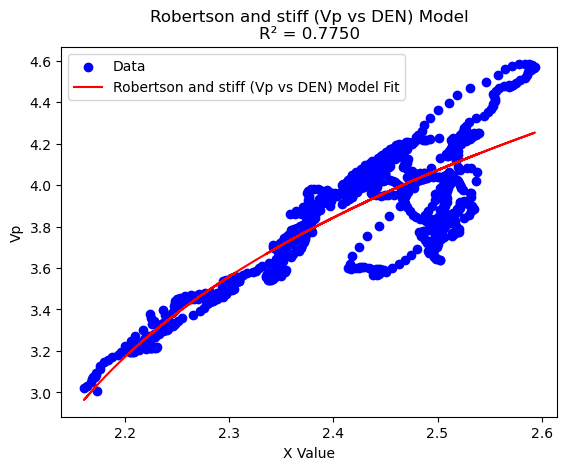

Robertson and stiff (Vp vs DEN) Model Parameters: [ 4.89057756 -2.04303315  0.23395863]
Robertson and stiff (Vp vs DEN) Model R²: 0.7750445373158625




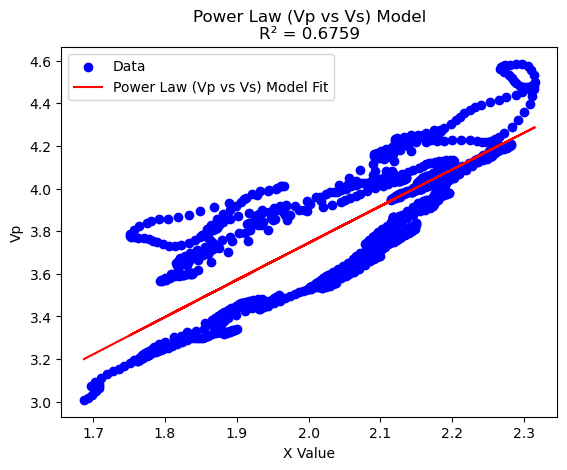

Power Law (Vp vs Vs) Model Parameters: [1.97264345 0.92483876]
Power Law (Vp vs Vs) Model R²: 0.6759028987176199




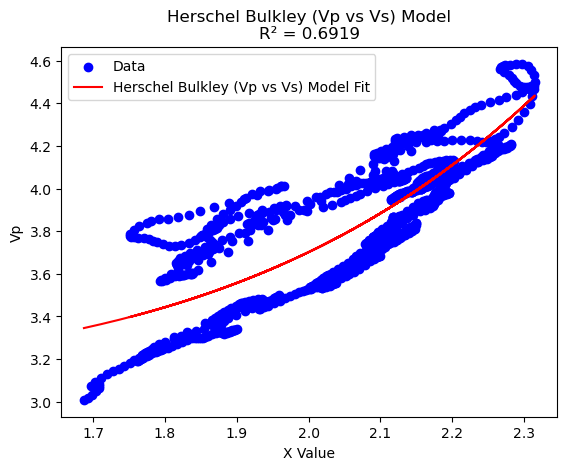

Herschel Bulkley (Vp vs Vs) Model Parameters: [0.01200413 5.59483039 3.12157269]
Herschel Bulkley (Vp vs Vs) Model R²: 0.6918536325537936




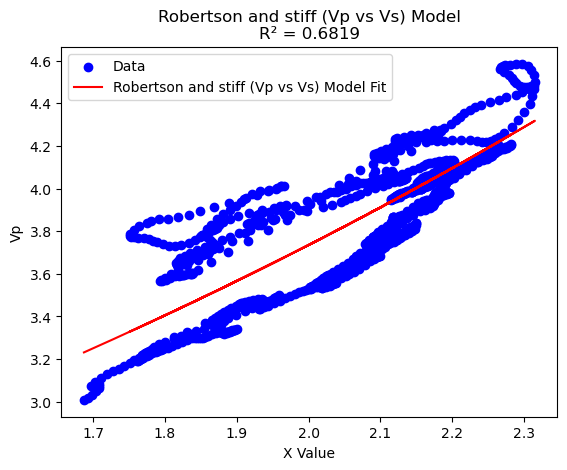

Robertson and stiff (Vp vs Vs) Model Parameters: [1.39305476e-41 5.02281751e+01 2.41156203e+01]
Robertson and stiff (Vp vs Vs) Model R²: 0.6819104253473722




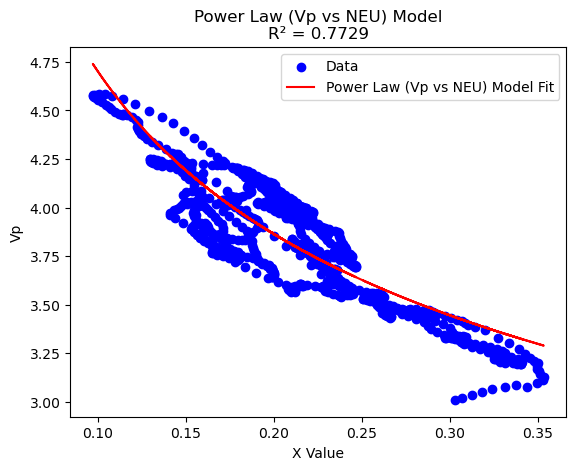

Power Law (Vp vs NEU) Model Parameters: [ 2.44943344 -0.28309466]
Power Law (Vp vs NEU) Model R²: 0.7728622862109473




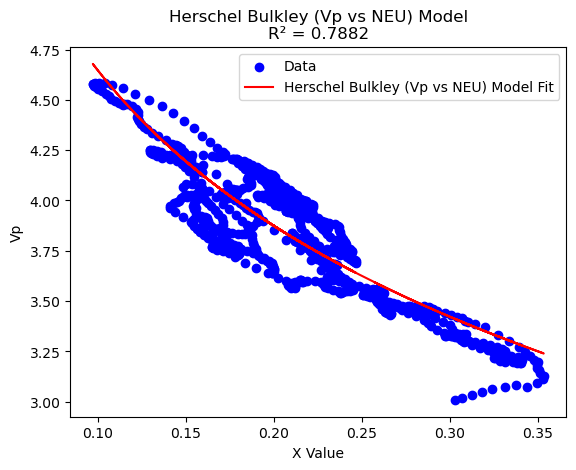

Herschel Bulkley (Vp vs NEU) Model Parameters: [ 6.49193635e+03 -1.71623007e-04 -6.48985627e+03]
Herschel Bulkley (Vp vs NEU) Model R²: 0.7881903644602732




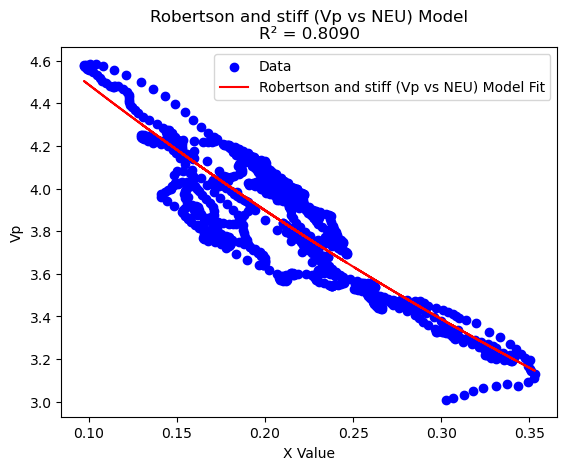

Robertson and stiff (Vp vs NEU) Model Parameters: [ 2.60751725e+37  1.99286326e+01 -2.82444210e+01]
Robertson and stiff (Vp vs NEU) Model R²: 0.8090022356218145




In [4]:
r2_scores["DEN"]["Power Law"].append(fit_and_plot_mapping(df['DEN'], df['Vp'], power_law, [1, 1], "Power Law (Vp vs DEN)"))
r2_scores["DEN"]["Herschel Bulkley"].append(fit_and_plot_mapping(df['DEN'], df['Vp'], herschel_bulkley, [1, 0.1, 1], "Herschel Bulkley (Vp vs DEN)"))
r2_scores["DEN"]["Robertson and Stiff"].append(fit_and_plot_mapping(df['DEN'], df['Vp'], robertson_stiff, [1, 1, 1], "Robertson and stiff (Vp vs DEN)"))

r2_scores["Vs"]["Power Law"].append(fit_and_plot_mapping(df['Vs'], df['Vp'], power_law, [1, 1], "Power Law (Vp vs Vs)"))
r2_scores["Vs"]["Herschel Bulkley"].append(fit_and_plot_mapping(df['Vs'], df['Vp'], herschel_bulkley, [1, 0.1, 1], "Herschel Bulkley (Vp vs Vs)"))
r2_scores["Vs"]["Robertson and Stiff"].append(fit_and_plot_mapping(df['Vs'], df['Vp'], robertson_stiff, [1, 1, 1], "Robertson and stiff (Vp vs Vs)"))

r2_scores["NEU"]["Power Law"].append(fit_and_plot_mapping(df['NEU'], df['Vp'], power_law, [1, 1], "Power Law (Vp vs NEU)"))
r2_scores["NEU"]["Herschel Bulkley"].append(fit_and_plot_mapping(df['NEU'], df['Vp'], herschel_bulkley, [1, 0.1, 1], "Herschel Bulkley (Vp vs NEU)"))
r2_scores["NEU"]["Robertson and Stiff"].append(fit_and_plot_mapping(df['NEU'], df['Vp'], robertson_stiff, [1, 1, 1], "Robertson and stiff (Vp vs NEU)"))

These plots are the same relational plots as earlier, now modeled with one of the three rheological models: Power Law, Herschel-Bulkley and Robertson and Stiff. These models are non-linear in nature, and the corresponding equations allow us to estimate how the feature influences the Vp. Under each plot is displayed the estimated optimized parameters for each, and the $\ R^2$ score that help indicate which of the models is the best fit.

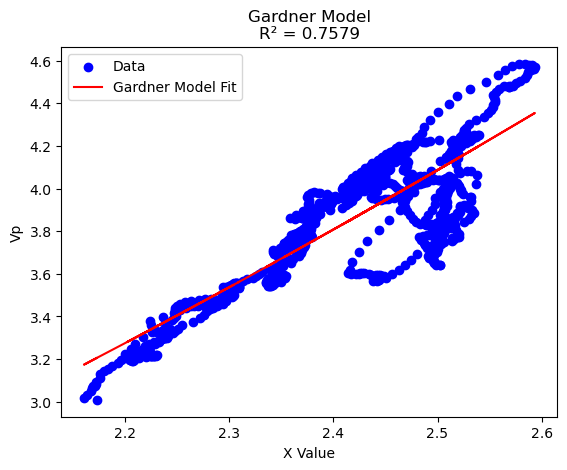

Gardner Model Parameters: [0.83632805 1.73130143]
Gardner Model R²: 0.7579363665252637




In [9]:
r2_scores["DEN"]["Gardner"].append(fit_and_plot_mapping(df['DEN'], df['Vp'], gardner_model, [1, 1], "Gardner"))

This graph displays the gardner model used with the DEN predictor to find the Vp.

The Gardner function goes:
- $\ y = a * DEN^b$

It is used to predict the Vp based on bulk density. 

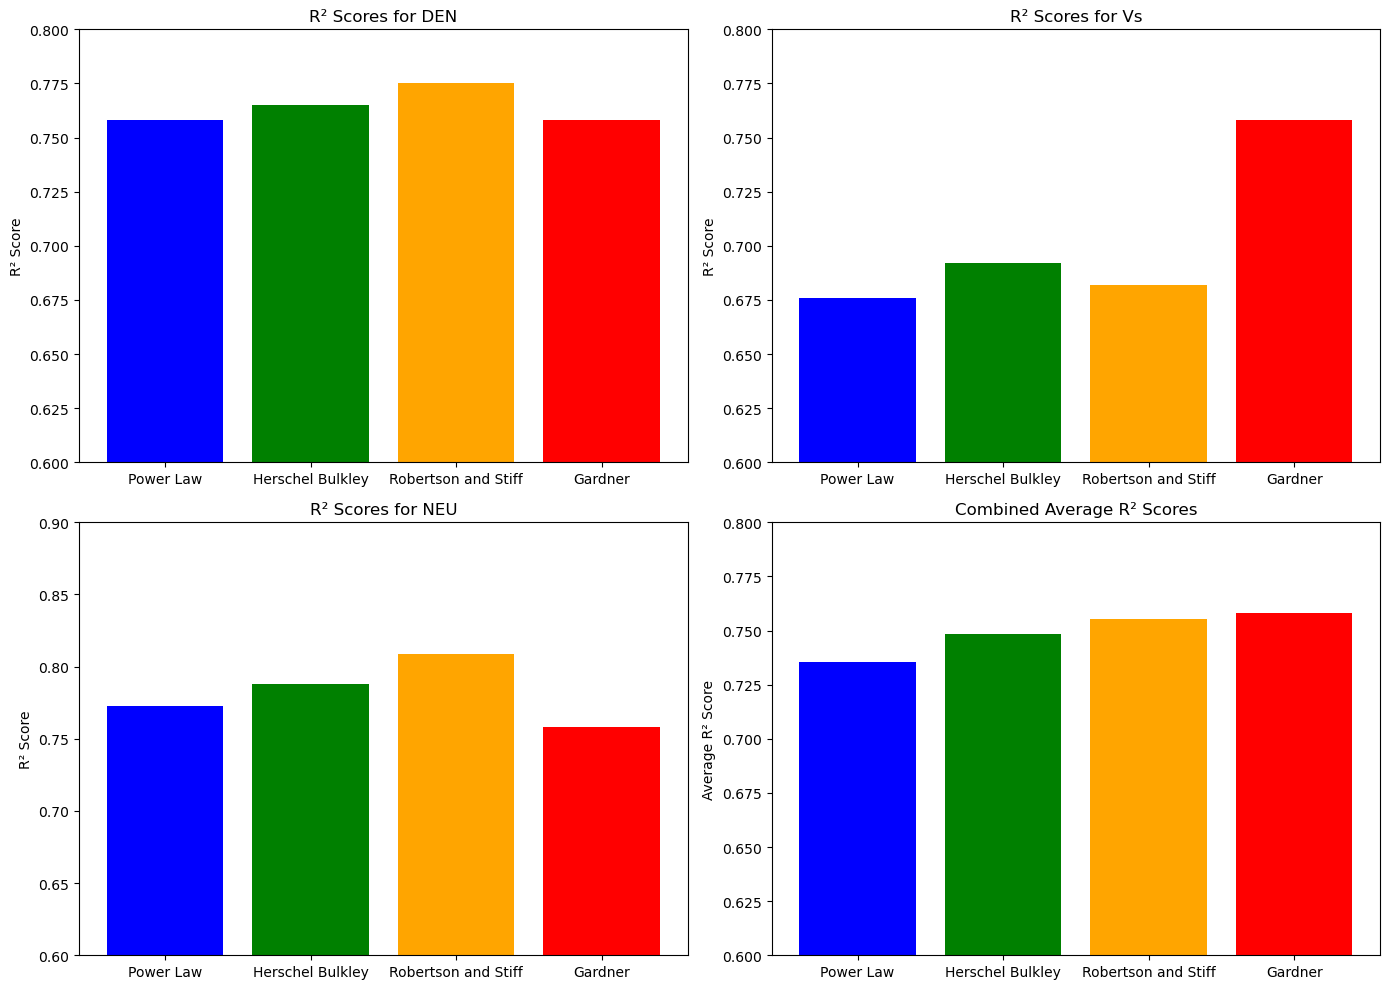

In [8]:
def gardner_model(x, a, b):
    return a * df['DEN']**b

for feature in ["DEN", "Vs", "NEU"]:
    try:
        popt, _ = curve_fit(gardner_model, df[feature], df['Vp'], p0=[310, 0.25])
        vp_pred_gardner = gardner_model(df[feature], *popt)
        r2_gardner = max(0, r2_score(df['Vp'], vp_pred_gardner)) 
        r2_scores[feature]["Gardner"] = [r2_gardner]
    except Exception as e:
        print(f"Error fitting Gardner model for {feature}:", e)
        r2_scores[feature]["Gardner"] = [np.nan]

combined_r2_scores = {
    model: np.nanmean([r2_scores[feature][model][0] for feature in r2_scores]) 
    for model in ["Power Law", "Herschel Bulkley", "Robertson and Stiff", "Gardner"]
}
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].bar(r2_scores["DEN"].keys(), [score[0] for score in r2_scores["DEN"].values()], color=['blue', 'green', 'orange', 'red'])
axs[0, 0].set_title("R² Scores for DEN")
axs[0, 0].set_ylabel("R² Score")
axs[0, 0].set_ylim(0.6, 0.8)

axs[0, 1].bar(r2_scores["Vs"].keys(), [score[0] for score in r2_scores["Vs"].values()], color=['blue', 'green', 'orange', 'red'])
axs[0, 1].set_title("R² Scores for Vs")
axs[0, 1].set_ylabel("R² Score")
axs[0, 1].set_ylim(0.6, 0.8)

axs[1, 0].bar(r2_scores["NEU"].keys(), [score[0] for score in r2_scores["NEU"].values()], color=['blue', 'green', 'orange', 'red'])
axs[1, 0].set_title("R² Scores for NEU")
axs[1, 0].set_ylabel("R² Score")
axs[1, 0].set_ylim(0.6, 0.9)

axs[1, 1].bar(combined_r2_scores.keys(), combined_r2_scores.values(), color=['blue', 'green', 'orange', 'red'])
axs[1, 1].set_title("Combined Average R² Scores")
axs[1, 1].set_ylabel("Average R² Score")
axs[1, 1].set_ylim(0.6, 0.8)

plt.tight_layout()
plt.show()


The graphs display the R² scores, representing the fit quality of different rheological models (Power Law, Herschel-Bulkley, Robertson and Stiff, and Gardner) across three predictor variables (DEN, Vs, NEU) in predicting Vp. $\ R^2$ values range from 0 to 1, where values closer to 1 indicate a better model fit. Each subplot display the performance of these models across different features, allowing for a comprehensive comparison of model effectiveness.

Top-left subplot displays the $\ R^2$ scores of each model when using DEN as the predictor. Here we observe that Robertson and Stiff perform well having a higher $\ R^2$ score than the other models. This suggests that DEN works well with this models functional form for predicting Vp. 

Top-right subplot illustrates the $\ R^2$ score for the Vs predictor across the models. This time the Gardner model outshines the others by far, providing a much better prediction with an $\ R^2$ over 0,5 higher than the second one wich is Herschal-Bulkley. 

In the bottom-left subplot, we see the $\ R^2$ scores for the NEU predictor. Here the Robertson and Stiff model performs the best, with an $\ R^2$ value of over 0,8. 

Last, in the bottom-right subplot, shows the average $\ R^2$ scores across all three predictors for each model, providing a good view of the overall model performance. From this, we see that Gardner comes out with the best average score, mainle due to its perfomance with Vs. Generally the Robertson and Stiff offer a more consistent perfomance, but just comes short in the average score due to re results with Vs.

### Conclusion

This task aimed to model the relationship between various geophysical parameters (Vp) and other geological features (DEN, Vs, NEU) using different rheological models. The goal was to find the best fitting models for predicting the Vp and analyze their accuracy to true measured values off Vp. Out of the different models tested, Robertson and Stiff model was the most consistent, but the Gardner model ended with the highest average $\ R^2$ score. In petroleum exploration, where accurate predictions of compressional wave velocities are critical for assessing subsurface properties and fluid behavior, Robertson and Stiff is the best to use in general on the basis of this data, but for Vs, Gardner outshines all the other models.

### Reflection

This task covered many new aspects we have not been through before. We learned how to select and apply appropriate models to real-world data, to test Power Law, Herschel-Bulkley and Robertson stiff wich best captured the relationship between the geophysical features of density, shear wave velocity, neutron porosity, and the compressional wave velocity. Also made use of the curve_fit function from Scipy and the concept of $\ R^2$ score as a metric for evaluating model fit wich we had not done before. it taught us also the Gardner model, where interpreting each of these models gave a deeper understanding of both the models themselves but also the importance and use it have in the real world, like in industries such as petroleum exploration.

In future work we would love to do more testing on the models and in different scenarios, to learn better how to apply curve fitting and optimization techniques, and start earlier with this task. It was a fun task and would be great to get to go deeper into the methods.

### References

- 3-Lecture 3 Mathematics and Statistics for ML modelling and analysis.pdf
- Project 3 Task 3 Non-Linear Regression With Scipy Optimize 2024.ipynb